In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('airline-passenger-traffic.csv', header = None)

In [4]:
df

,0,1
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [5]:
df.columns = ['Months', 'Passengers']

In [6]:
df['Months'] = pd.to_datetime(df['Months'], format = '%Y-%m')

In [7]:
df

,Months,Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


In [8]:
df = df.set_index('Months')

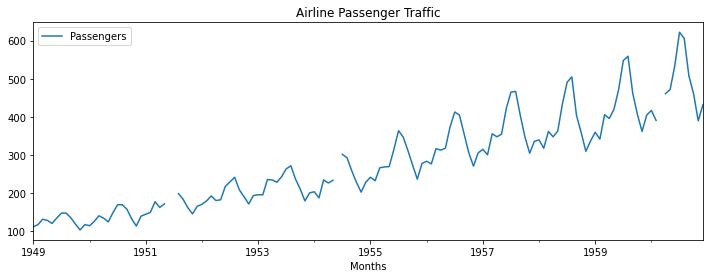

In [9]:
df.plot(figsize=(12,4))
plt.legend(loc = 'best')
plt.title('Airline Passenger Traffic')
plt.show()

In [10]:
# Linear Inter Polation
df['Passengers'] = df['Passengers'].interpolate(method = 'linear')

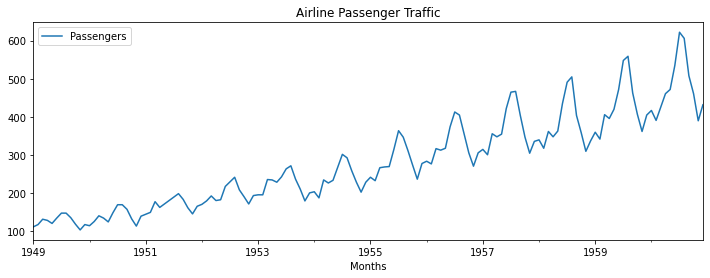

In [11]:
df.plot(figsize = (12,4))
plt.legend(loc = 'best')
plt.title('Airline Passenger Traffic')
plt.show()

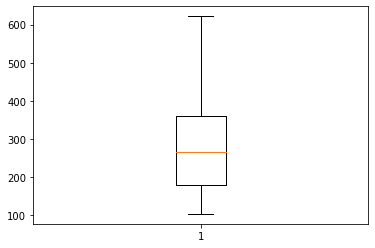

In [12]:
plt.boxplot(df['Passengers'])
plt.show()

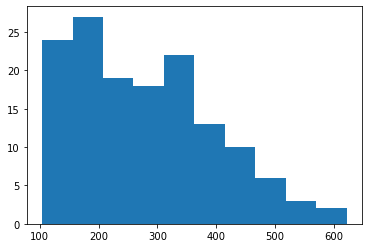

In [13]:
plt.hist(df['Passengers'])
plt.show()

In [14]:
import statsmodels.api as sm

In [15]:
#from statsmodels.api.tsa

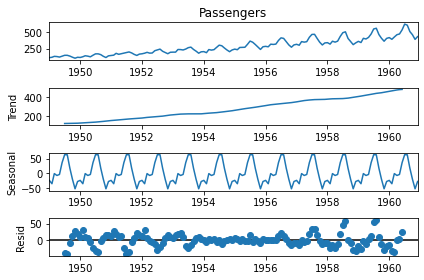

In [16]:
decomposition = sm.tsa.seasonal_decompose(df.Passengers, model = 'additive')
fig = decomposition.plot()
plt.show()

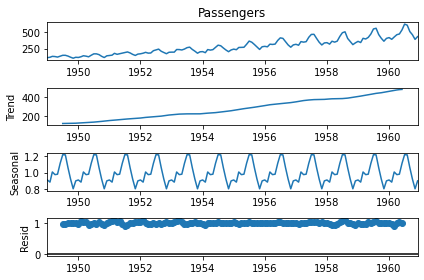

In [17]:
decomposition = sm.tsa.seasonal_decompose(df.Passengers, model = 'multiplicative')
fig = decomposition.plot()
plt.show()

## Split the time series

In [18]:
train_len = 120

In [19]:
train = df[0:train_len]
test = df[train_len:]

## Simple Exponential Smoothing

In [20]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [21]:
model = SimpleExpSmoothing(train['Passengers'])

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [22]:
model_fit = model.fit(smoothing_level=0.2, optimized=False)

In [23]:
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [24]:
y_pred = model_fit.forecast(24)

In [25]:
test['simple']= y_pred

In [26]:
test['Passengers']

Months
1959-01-01    360.0
1959-02-01    342.0
1959-03-01    406.0
1959-04-01    396.0
1959-05-01    420.0
1959-06-01    472.0
1959-07-01    548.0
1959-08-01    559.0
1959-09-01    463.0
1959-10-01    407.0
1959-11-01    362.0
1959-12-01    405.0
1960-01-01    417.0
1960-02-01    391.0
1960-03-01    426.0
1960-04-01    461.0
1960-05-01    472.0
1960-06-01    535.0
1960-07-01    622.0
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: Passengers, dtype: float64

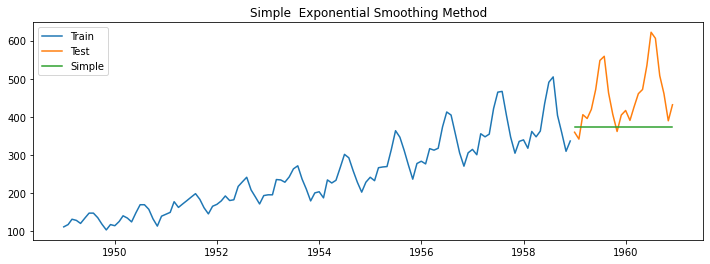

In [27]:
plt.figure(figsize = (12, 4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(test['simple'], label = 'Simple')
plt.legend(loc ='best')
plt.title('Simple  Exponential Smoothing Method')
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error


In [29]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_pred)).round(2)

In [30]:
rmse

107.65

In [31]:
mape = np.round(np.mean(np.abs(test['Passengers'] - y_pred)/test['Passengers'])*100,2)

In [32]:
mape

16.49

In [33]:
results = pd.DataFrame({'Method':['Simple  Exponential Smoothing Method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing Method,107.65,16.49


## Exponential Smoothing Mothods

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [35]:
model=ExponentialSmoothing(np.asarray(train['Passengers']),seasonal_periods=12,trend= 'multiplicative',seasonal=None)

In [36]:
model= model.fit(smoothing_level=0.2,smoothing_slope=0.01,optimized=False)

In [37]:
model.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 118.4666666666666,
 'initial_trend': 1.01739397349977,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [38]:
y_pred = model_fit.forecast(len(test))

In [39]:
test['holt']= y_pred

In [40]:
test['Passengers']

Months
1959-01-01    360.0
1959-02-01    342.0
1959-03-01    406.0
1959-04-01    396.0
1959-05-01    420.0
1959-06-01    472.0
1959-07-01    548.0
1959-08-01    559.0
1959-09-01    463.0
1959-10-01    407.0
1959-11-01    362.0
1959-12-01    405.0
1960-01-01    417.0
1960-02-01    391.0
1960-03-01    426.0
1960-04-01    461.0
1960-05-01    472.0
1960-06-01    535.0
1960-07-01    622.0
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: Passengers, dtype: float64

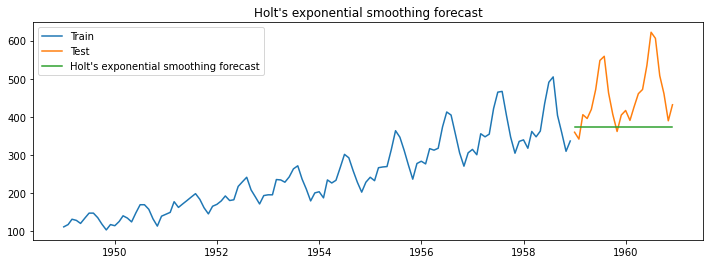

In [41]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(test['holt'],label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s exponential smoothing forecast')
plt.show()

In [42]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_pred)).round(2)

In [43]:
rmse

107.65

In [44]:
mape = np.round(np.mean(np.abs(test['Passengers']-y_pred)/test['Passengers'])*100,2)

In [45]:
mape

16.49

In [46]:
Result2 = pd.DataFrame({'Method':['Holt\'s  Exponential Smoothing Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, Result2])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing Method,107.65,16.49
0,Holt's Exponential Smoothing Method,107.65,16.49


##  Holt winters

In [47]:
model=ExponentialSmoothing(np.asarray(train['Passengers']),seasonal_periods=12,trend= 'additive',seasonal='mul')

In [48]:
model= model.fit(optimized=True)

In [49]:
print(model.params)

{'smoothing_level': 0.3655776181336739, 'smoothing_trend': 7.000160790713375e-07, 'smoothing_seasonal': 0.6344221915208443, 'damping_trend': nan, 'initial_level': 100.91058555806529, 'initial_trend': 2.1854790058193623, 'initial_seasons': array([1.08633829, 1.14268054, 1.25600203, 1.19404046, 1.10209938,
       1.205238  , 1.31063023, 1.30172641, 1.18746833, 1.03480496,
       0.91994195, 1.06136388]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [50]:
y_pred=model.forecast(24)

In [51]:
test['Pred_HW']=y_pred

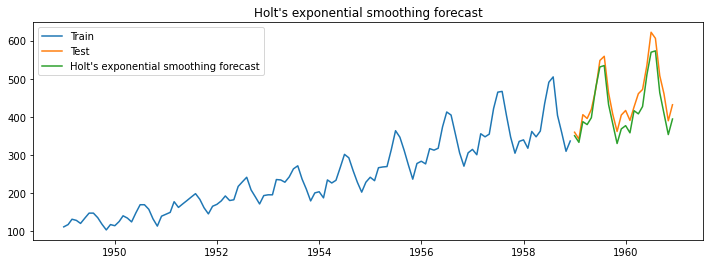

In [52]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(test['Pred_HW'],label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s exponential smoothing forecast')
plt.show()

In [53]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_pred)).round(2)

In [54]:
rmse

32.45

In [55]:
mape = np.round(np.mean(np.abs(test['Passengers'] -y_pred)/test['Passengers'])*100,2)


In [56]:
mape

6.45

In [57]:
Result3 = pd.DataFrame({'Method':['Holt\'s Winter  Exponential Smoothing Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, Result3])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing Method,107.65,16.49
0,Holt's Exponential Smoothing Method,107.65,16.49
0,Holt's Winter Exponential Smoothing Method,32.45,6.45
